In [1]:
import polars_bio as pb
import pandas as pd
from polars_bio.io import read_fastq
import polars as pl

INFO:polars_bio:Creating BioSessionContext


In [2]:
df = read_fastq("example2.fastq")
pl.Config.set_tbl_rows(100)

INFO:polars_bio:Table: example2 registered for path: example2.fastq


polars.config.Config

In [3]:
print(pb.sql("SELECT kmer_count(sequence, 3) AS result FROM example2 LIMIT 60").collect())

0rows [00:00, ?rows/s]

shape: (28, 1)
┌───────────┐
│ result    │
│ ---       │
│ struct[2] │
╞═══════════╡
│ {"ACC",2} │
│ {"AGG",1} │
│ {"CTC",3} │
│ {"TCA",2} │
│ {"AAG",3} │
│ {"GTA",3} │
│ {"ACG",1} │
│ {"CAG",1} │
│ {"AAA",6} │
│ {"AAT",4} │
│ {"ATA",3} │
│ {"ACA",2} │
│ {"TAA",2} │
│ {"AAC",1} │
│ {"CTA",2} │
│ {"CCC",1} │
│ {"CCA",3} │
│ {"CGC",1} │
│ {"GGA",1} │
│ {"GAC",1} │
│ {"ATG",4} │
│ {"AGA",1} │
│ {"GCC",1} │
│ {"ATC",1} │
│ {"GCA",3} │
│ {"GAA",1} │
│ {"CAA",5} │
│ {"AGC",5} │
└───────────┘


In [4]:
df2 = read_fastq("example.fastq")
sql_result = pb.sql("SELECT kmer_count(sequence, 5) AS result FROM example").collect()
print(sql_result)



INFO:polars_bio:Table: example registered for path: example.fastq


0rows [00:00, ?rows/s]

shape: (512, 1)
┌──────────────┐
│ result       │
│ ---          │
│ struct[2]    │
╞══════════════╡
│ {"CGCCA",16} │
│ {"TCAAA",63} │
│ {"ACATG",50} │
│ {"CGAAC",5}  │
│ {"GTAAC",19} │
│ {"GACTA",23} │
│ {"AAACG",7}  │
│ {"GCGGA",14} │
│ {"ACTAG",16} │
│ {"CTGAC",29} │
│ {"AAGCA",49} │
│ {"GTCGA",8}  │
│ {"CACGC",24} │
│ {"ACAGA",68} │
│ {"TGCAA",45} │
│ {"CCCCC",42} │
│ {"CCTTC",65} │
│ {"CATAC",26} │
│ {"AGCCA",66} │
│ {"TATGA",36} │
│ {"CACCC",43} │
│ {"CGTTA",8}  │
│ {"ATGAG",53} │
│ {"ACTCT",34} │
│ {"GCTCC",42} │
│ {"TGAAA",66} │
│ {"AGACC",25} │
│ {"AATCG",9}  │
│ {"AATTG",27} │
│ {"CAATA",28} │
│ {"AGCAT",38} │
│ {"AATAC",23} │
│ {"CCTAA",13} │
│ {"TACAA",45} │
│ {"GCACC",25} │
│ {"AGCGC",19} │
│ {"ATTAC",20} │
│ {"GGGAC",41} │
│ {"AATCC",35} │
│ {"AAGCG",15} │
│ {"AGTCG",9}  │
│ {"CGCCG",9}  │
│ {"CTAGA",26} │
│ {"AGACA",52} │
│ {"AGGAG",99} │
│ {"CTATA",19} │
│ {"AGATC",46} │
│ {"GTTAA",23} │
│ {"GAACC",22} │
│ {"CCTGC",66} │
│ …            │
│ {"GCTGA",47} │
│ {"GTGTA",29} 

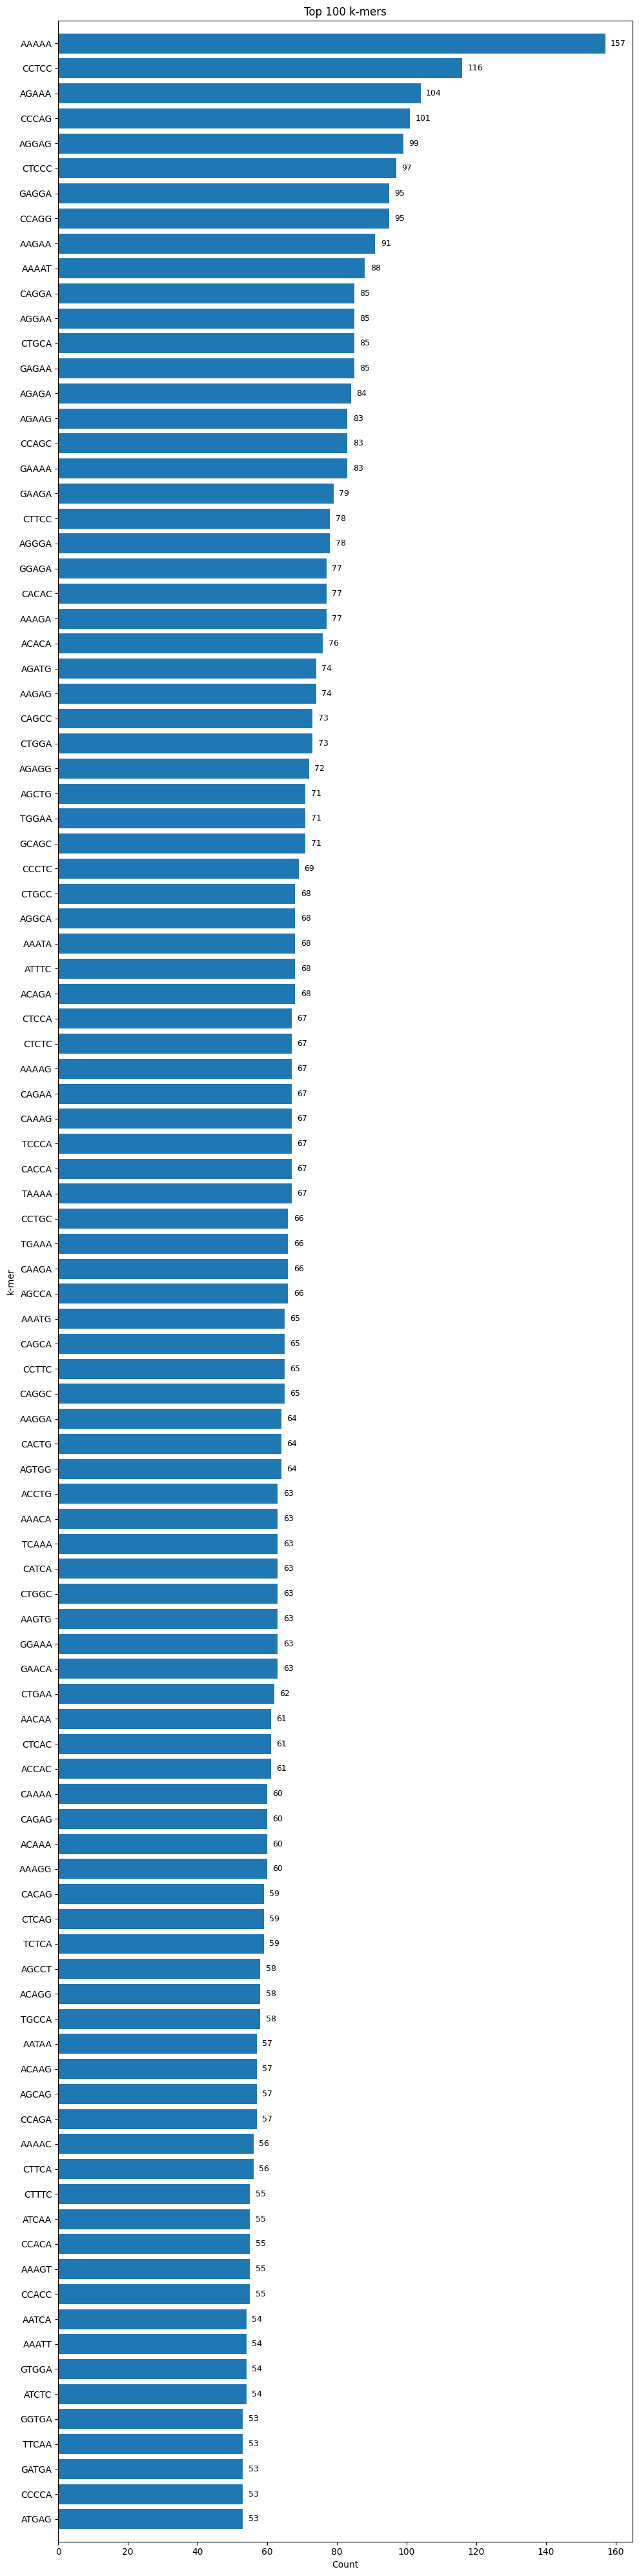

In [9]:
pb.plot_kmer_counts(sql_result, top_n=100)